Step 1: Import Required Libraries

Import necessary libraries for data handling, visualization, clustering, and evaluation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


Step 2: Load and Preview the Dataset

Read the dataset from the given path and preview the first few rows to understand its structure.

In [2]:
data = pd.read_csv("C:/Users/swath/Downloads/Mall/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Step 3: Dataset Overview

Check basic information about the dataset such as column names, data types, and summary statistics.

In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Step 4: Null Values Check

Verify if there are any missing values in the dataset that need to be handled.

In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Step 5: Feature Selection

Select relevant features for clustering — we choose:
- Annual Income (k$)
- Spending Score (1-100)

These two features help identify customer behavior and spending patterns.


Step 6: Feature Scaling

Standardize the features using `StandardScaler` so that K-Means isn't biased by feature magnitude.


In [5]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Step 7: Determine Optimal Number of Clusters using Elbow Method

We run K-Means for a range of K (1 to 10) and compute the inertia (sum of squared distances from each point to its cluster center). The 'elbow point' in the plot helps us decide the optimal value of K.

Step 8: Plot the Elbow Curve

Visualize the inertia for each value of K to find the "elbow point", which indicates the optimal number of clusters.

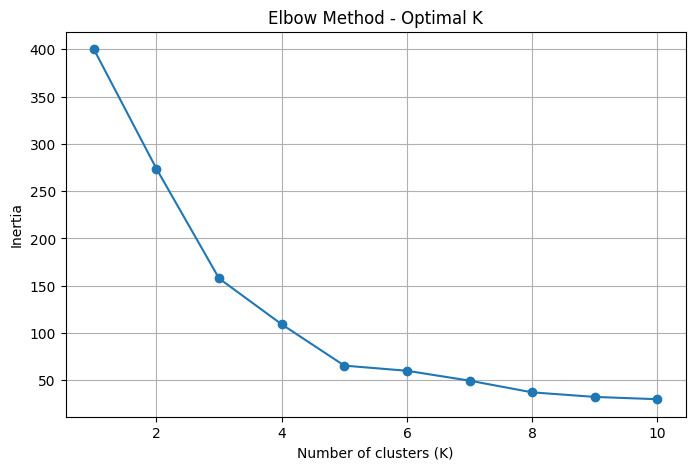

In [11]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

Step 9: Apply K-Means with Chosen K (Here, K = 5)

From the elbow plot, we choose K=5 and fit K-Means on the scaled data. The resulting labels represent the cluster each customer belongs to.


Step 10: Add Cluster Labels to the Original Data

Store the predicted cluster labels into the original DataFrame for visualization.


In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)

data['Cluster'] = labels

Step 11: Visualize the Clusters

Plot the clusters based on Annual Income and Spending Score. Use different colors for each cluster.

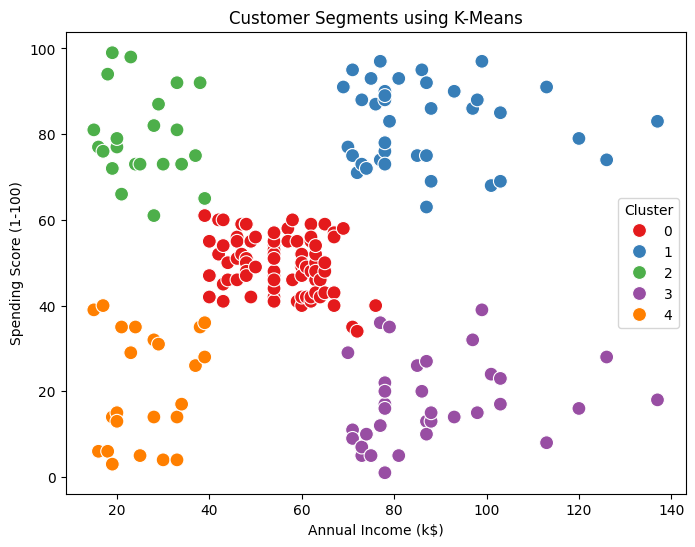

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', data=data, s=100)
plt.title('Customer Segments using K-Means')
plt.show()

Step 12: Evaluate Clustering with Silhouette Score

Use the Silhouette Score to evaluate how well the data points are clustered. It ranges from -1 (worst) to +1 (best).

In [9]:
score = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.55


Step 13: Optional PCA for 2D Cluster Visualization

Perform Principal Component Analysis (PCA) to reduce dimensions and plot data in 2D while retaining as much variance as possible.

Step 14: Plot PCA-Based Cluster View

Visualize clusters in 2D space after dimensionality reduction using PCA.

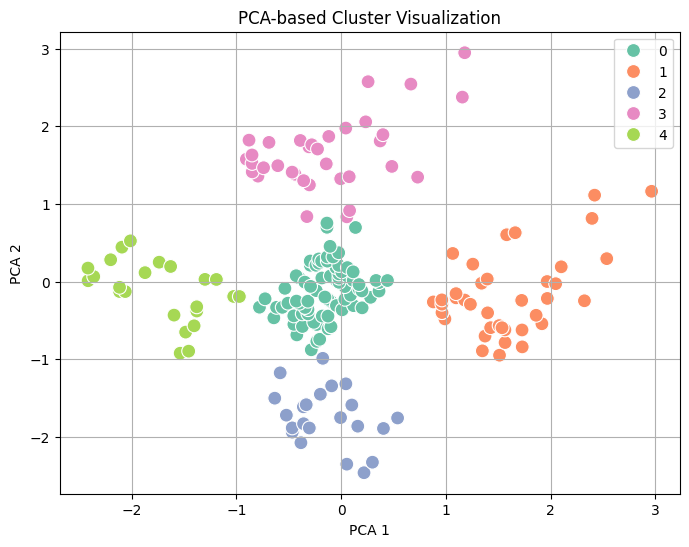

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='Set2', s=100)
plt.title('PCA-based Cluster Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()
